# Auswertung Versuch 233: Fourier-Optik

## Teil 1: Quantitative Beobachtungen am Einzelspalt

### Bestimmung der Spaltbreite

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
from scipy.optimize import curve_fit
plt.rcParams['errorbar.capsize']=2

In [11]:
#Bestimmung der Abstände der Minima 
min_order=np.array([1,2,3,4,5])
min_pos_left=np.array([932.69,838.65,749.67,659.80,575.26]) #von der ersten bis zur fünften Ordnung 
min_pos_right=np.array([1109.38,1187.47,1275.56,1361.87,1447.30])

delta_min=np.abs(min_pos_left-min_pos_right)
delta_min_err=np.sqrt(2)*3*np.ones(5) #Fehler jeweils 3pxl

#Bestimmung der Abstände der Maxima
max_order=np.array([1.5,2.5,3.5,4.5,5.5])
max_pos_left=np.array([889.78,799.50,709.63,625.09,532.55])
max_pos_right=np.array([1137.36,1228.40,1320.05,1400.14,1490.01])

#Abstände der jeweiligen Beugungsordnungen
delta_max=np.abs(max_pos_left-max_pos_right)
delta_max_err=np.sqrt(2)*3*np.ones(5)

In [12]:
#Eichung der Pixelskala zum Umrechnen des Spaltabstands in Längeneinheiten 
dpx=np.array([387.04,546.71,723.74,897.30])
dpx_err=3*np.ones(4)
slit_aperture=np.array([0.88,1.26,1.70,2.12]) #direkt die Messwerte verdoppelt
slit_aperture_err=0.02*np.ones(4)

gauge=slit_aperture/dpx  #Faktor zur Umrechnung von Pixel in mm
gauge_err=gauge*np.sqrt((slit_aperture_err/slit_aperture)**2+(dpx_err/dpx)**2)


Der Spaltabstand entspricht der Steigung der Fit-Gerade:
d = 174.395001004 +/- 0.69221374115 pxl


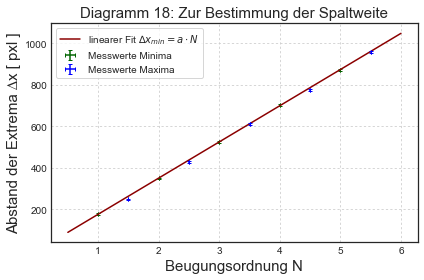

In [13]:
#Definition der linearen Fit-Funktion
def linear_fit(x,a,b):
    return a*x+b
popt,pcov=curve_fit(linear_fit,min_order,delta_min,sigma=delta_min_err)

x_fit=np.linspace(0.5,6,100) #Länge der Fit-Gerade
x_err=np.zeros(5) #Nur zur Optik der Legende

#Plot der Minima-Abstände mit lin.Fit
plt.plot(min_order,delta_min,linestyle='')
plt.errorbar(min_order,delta_min,xerr=x_err,yerr=delta_min_err,color='darkgreen',linestyle='',label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')

#Plot der Maxima-Abstände 
plt.plot(max_order,delta_max,linestyle='')
plt.errorbar(max_order,delta_max,xerr=x_err,yerr=delta_max_err,color='b',linestyle='',label='Messwerte Maxima')

#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Diagramm 18: Zur Bestimmung der Spaltweite',size=15)
plt.grid(ls='dotted')
plt.legend(frameon=True)
#plt.text(4,150,'a = ' ,bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm18.pdf',format='PDF')

slit_width=popt[0]
slit_width_err=pcov[0,0]**0.5

print('Der Spaltabstand entspricht der Steigung der Fit-Gerade:')
print( 'd = ' + str(slit_width) + ' +/- ' + str(slit_width_err) + ' pxl')


In [14]:
#Umrechnung der Spaltbreite in mm
slit_width_mm= gauge*slit_width
slit_width_mm_err=np.sqrt((gauge_err)**2+(slit_width_err*gauge)**2)

sw_mm_mean=np.mean(slit_width_mm)
sw_mm_mean_syst=np.mean(slit_width_mm_err)
sw_mm_mean_std=np.std(slit_width_mm)/np.sqrt(len(slit_width_mm))

print('Mit der Eichung der Skala erhalten wir den Spaltabstand in mm:')
print( 'd = ' + str(sw_mm_mean) + ' +/- ' + str(sw_mm_mean_syst) + ' +/- ' + str(sw_mm_mean_std)+ ' mm')


Mit der Eichung der Skala erhalten wir den Spaltabstand in mm:
d = 0.405028704844 +/- 0.00160811456131 +/- 0.00308618273374 mm


### Vergleich der relativen Intensitäten aus den beide Messreihen

In [18]:
#zunächst einmal muss das Verhältnis aus der ersten Messung bestimmt werden,da bei der zweiten das 0. Max. übersteuert
#für den Fehler der counts gilt allgemein:

intensity_err=10

#erste Messung
max0_intesity1=3779.50
#Abziehen des Untergrunds durch Mittlung des linken und des rechten Untergrundes
max0_1_corr=(max0_intesity1-(ug_left1+ug_right1/2))
max0_1_corr_err=max0_1_corr*np.sqrt((intensity_err/max0_intesity1)**2+(intensity_err/ug_left1)**2+(intensity_err/ug_right1)**2)

max1_intensity_left1=448.33 
ug_left1=259.10
#Abziehen des linken Untergrunds
max1_left1_corr=max1_intensity_left1-ug_left1
max1_left1_corr_err=np.sqrt(2)*intensity_err

max1_intensity_right1=430.48
ug_right1=265.22
#Abziehen des rechten Untergrunds
max1_right1_corr=max1_intensity_right1-ug_right1
max1_right1_corr_err=np.sqrt(2)*intensity_err

#Verhältnis vom nullten zum ersten Maximum
prob_max1_max0_left =max1_left1_corr/max0_1_corr
prob_left_err =prob_max1_max0_left*np.sqrt((max1_left1_corr_err/max1_left1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

prob_max1_max0_right = max1_right1_corr/max0_1_corr
prob_right_err= prob_max1_max0_right*np.sqrt((max1_right1_corr_err/max1_right1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

print('Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_left) + ' +/- ' + str(prob_left_err))
print()
print('Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_right) + ' +/- ' + str(prob_right_err))
print()



Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:
0.055856472803804236 +/- 0.00515079160267

Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:
0.04878106376133113 +/- 0.00493661235928



In [19]:
#Ab hier werden die Messdaten der zweiten Messreihe verwendet
max_intensity_left2=np.array([3609.03,1599.67,1105.51,781.61,623.61])
ug_left2=397.31*np.ones(5)

max_intensity_left2_corr=max_intensity_left2-ug_left2
max_intensity_left2_corr_err=np.sqrt(2)*intensity_err*np.ones(5)

max_intensity_right2=np.array([3706.94,1696.92,958.20,745.08,620.04])
ug_right2=330.56*np.ones(5)

max_intensity_right2_corr=max_intensity_right2-ug_right2
max_intensity_right2_corr_err=np.sqrt(2)*intensity_err*np.ones(5)

#Jetzt können wir anhand des Ergebnisses die Werte für die zweite Messreihe durch Umrechnung bestimmen
max0_intesity2_left=(1/prob_max1_max0_left)*max_intensity_left2_corr[0]
max0_intesity2_left_err=max0_intesity2_left*np.sqrt((prob_left_err/prob_max1_max0_left)**2+(intensity_err/max_intensity_left2_corr[0])**2)

max0_intesity2_right=(1/prob_max1_max0_right)*max_intensity_right2_corr[0]
max0_intesity2_right_err=max0_intesity2_right*np.sqrt((prob_right_err/prob_max1_max0_right)**2+(intensity_err/max_intensity_right2_corr[0])**2)

max0_intensity2_tot=(max0_intesity2_left+max0_intesity2_right)/2
max0_intensity2_tot_err=max0_intensity2_tot*np.sqrt((max0_intesity2_left_err/max0_intesity2_left)**2+(max0_intesity2_left_err/max0_intesity2_right)**2)

print('Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: ')
print('I_max0 = ' + str(max0_intensity2_tot) + ' +/- ' + str(max0_intensity2_tot_err))
print()

#Jetzt können wir das Verhältnis zum nullten Maximum trotz der Übersteuerung ausrechnen!
max0_2=max0_intensity2_tot*np.ones(5)

prob_max_max0_left=max_intensity_left2_corr/max0_intensity2_tot
prob_max_max0_left_err=prob_max_max0_left*np.sqrt((max_intensity_left2_corr_err/max_intensity_left2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

prob_max_max0_right=max_intensity_right2_corr/max0_intensity2_tot
prob_max_max0_right_err=prob_max_max0_right*np.sqrt((max_intensity_right2_corr_err/max_intensity_right2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

print('Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:')
print('linke Maxima: ' + str(prob_max_max0_left))
print('Fehler links: ' + str(prob_max_max0_left_err))
print()
print('rechte Maxima: ' + str(prob_max_max0_right))
print('Fehler rechts: ' + str(prob_max_max0_right_err))



Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: 
I_max0 = 63357.2430279 +/- 7599.82634902

Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:
linke Maxima: [ 0.05069223  0.01897747  0.01117789  0.0060656   0.00357181]
Fehler links: [ 0.00608473  0.0022873   0.00135926  0.00076105  0.0004831 ]

rechte Maxima: [ 0.05329114  0.02156596  0.00990637  0.00654258  0.00456901]
Fehler rechts: [ 0.00639627  0.00259649  0.00120907  0.00081592  0.00059177]


### Berechung der theoretischen Intensitätsverhältnisse

Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:
[ 0.04719045  0.01648003  0.00834029  0.00502872  0.00336073]


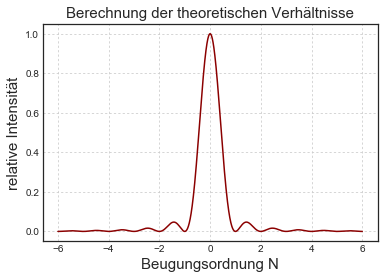

In [20]:
from scipy.signal import argrelextrema

def beugung_spalt(x):
    return np.sinc(x)**2
a=5
v=2
#kleinere Schrittweite für präzisere Berechnung der Maxima, ungerade Anzahl damit nur einmal das nullte berechnet wird
x=np.linspace(-(a+1),a+1,200001)

#Berechnung der relativen Maxima
slit_theory=argrelextrema(beugung_spalt(x), np.greater_equal, order = 1) 
max_theory=np.array(beugung_spalt(x[slit_theory]))
max_theory_sliced=max_theory[4::-1]

print('Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:')
print(max_theory_sliced)

plt.plot(x,beugung_spalt(x),color='darkred')
plt.title('Berechnung der theoretischen Verhältnisse',size=15)
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('relative Intensität',size=15)
plt.grid(ls='dotted')


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [21]:
#Wir gehen bei den Theorie-Werten von einer fehlerfreien Bestimmung aus

#linke Seite
diff_max_theory_left=np.abs(max_theory_sliced-prob_max_max0_left)

#rechte Seite 
diff_max_theory_right=np.abs(max_theory_sliced-prob_max_max0_right)

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_theory_left)
print('mit Fehler:')
print(prob_max_max0_left_err)
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_theory_right)
print('mit Fehler:')
print(prob_max_max0_right_err)
print()
print('Die Werte liegen somit alle mindestens im 3-Sigma Intervall.')

Der Vergleich liefert für die linke Seite:
[ 0.00350178  0.00249744  0.00283759  0.00103689  0.00021108]
mit Fehler:
[ 0.00608473  0.0022873   0.00135926  0.00076105  0.0004831 ]

Der Vergleich liefert für die rechte Seite:
[ 0.0061007   0.00508594  0.00156607  0.00151386  0.00120828]
mit Fehler:
[ 0.00639627  0.00259649  0.00120907  0.00081592  0.00059177]

Die Werte liegen somit alle mindestens im 3-Sigma Intervall.


## Teil 2: Beugungsstruktur des Doppelspaltes

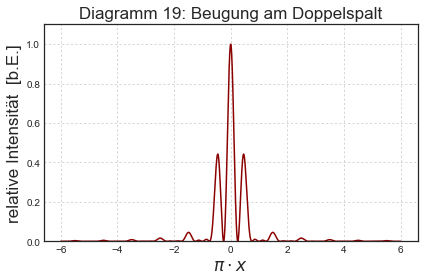

In [22]:
#Beugungsfunktion des Doppelspalts

def beugung_doppelspalt(x):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2

#Berechnung des Verhältnisses von Spaltabstand & Spaltbreite



plt.plot(x,beugung_doppelspalt(x),color='darkred')
plt.title('Diagramm 19: Beugung am Doppelspalt',size=17)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm19.pdf',format='PDF')




## Teil 3: Das Objektbild als Fouriersynthese

## Teil 4: Fourierbild des Doppelspaltes